# Import library

In [53]:
%pip install matplotlib pandas numpy seaborn wordcloud

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
df = pd.read_csv('Data/perfect_data.csv')

# Reactions

    1. Top 5 bài viết có nhiều tương tác nhất

In [56]:
top_5_reactions_posts = df.nlargest(5, 'reaction_count')
top_5_reactions_posts[['post_text', 'time', 'reaction_count']]

,post_text,time,reaction_count
55,Hundreds of thousands of children and families...,2023-10-16 03:05:00,8048
59,The situation for children in the Middle East ...,2023-10-15 00:00:01,4901
43,UNICEF supplies are standing by and ready to g...,2023-10-20 03:29:34,3329
50,UNICEF strongly condemns the strike on the Al ...,2023-10-18 02:40:24,3017
47,"Food, water, fuel and medical supplies are on ...",2023-10-18 22:22:03,2762


    2. Sự thay đổi số reaction theo thời gian


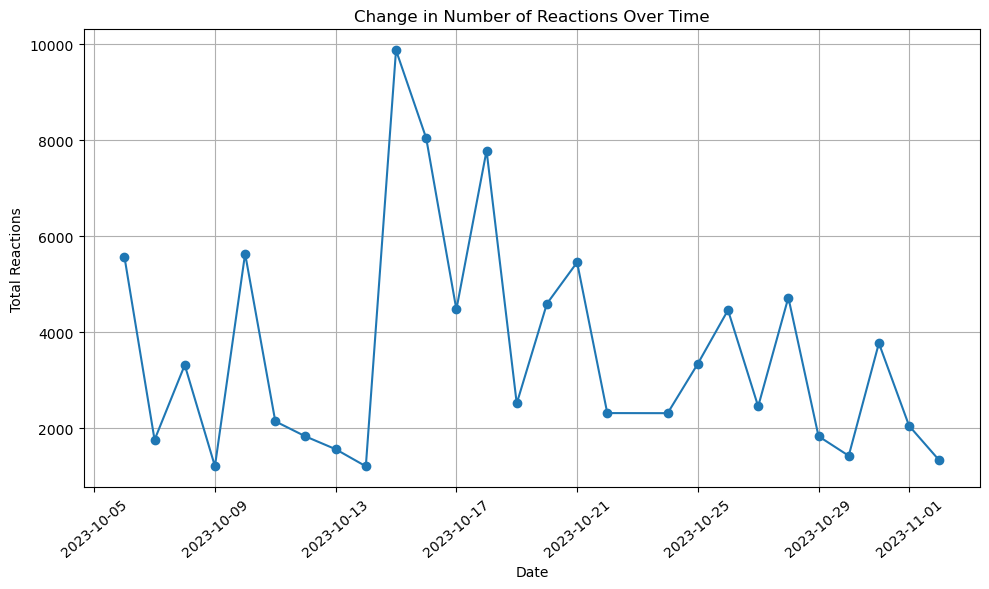

In [57]:
df['time'] = pd.to_datetime(df['time'])
# Group by date and sum the reaction counts
reactions_by_date = df.groupby(df['time'].dt.date)['reaction_count'].sum()

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(reactions_by_date, marker='o', linestyle='-')
plt.title('Change in Number of Reactions Over Time')
plt.xlabel('Date')
plt.ylabel('Total Reactions')
plt.xticks(rotation=40)
plt.grid(True)
plt.tight_layout()

    3. Sự thay đổi số lượt share của bài viết theo thời gian

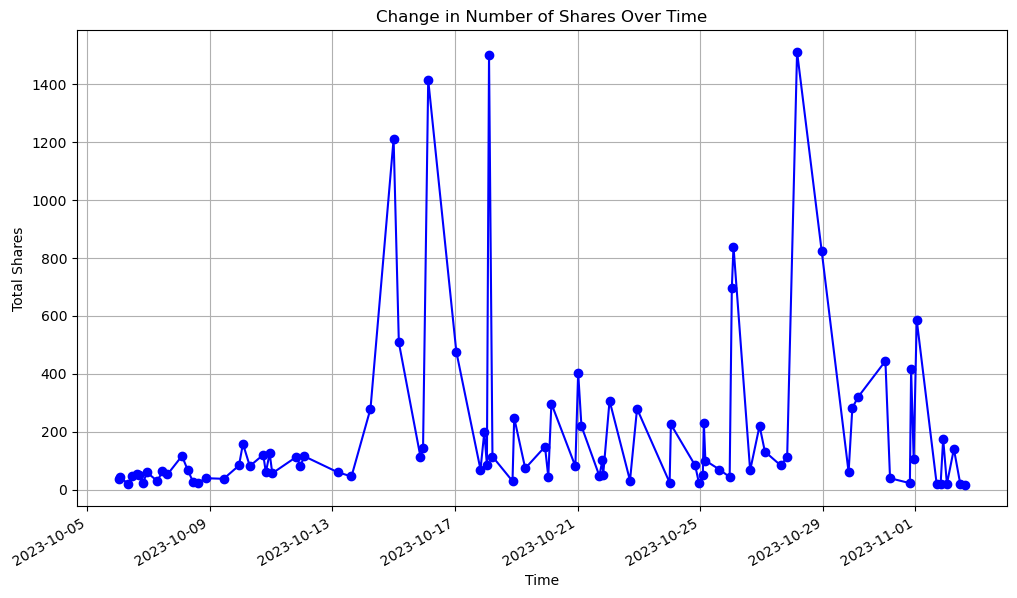

In [58]:
# Group by time and calculate the sum of shares for each time period
shares_by_time = df.groupby('time')['shares'].sum()

# Plotting
plt.figure(figsize=(12, 7))
shares_by_time.plot(kind='line', marker='o', color='blue')
plt.title('Change in Number of Shares Over Time')
plt.xlabel('Time')
plt.ylabel('Total Shares')
plt.grid(True)
plt.show()

    3. Sự thay đổi số lượt comment theo thời gian

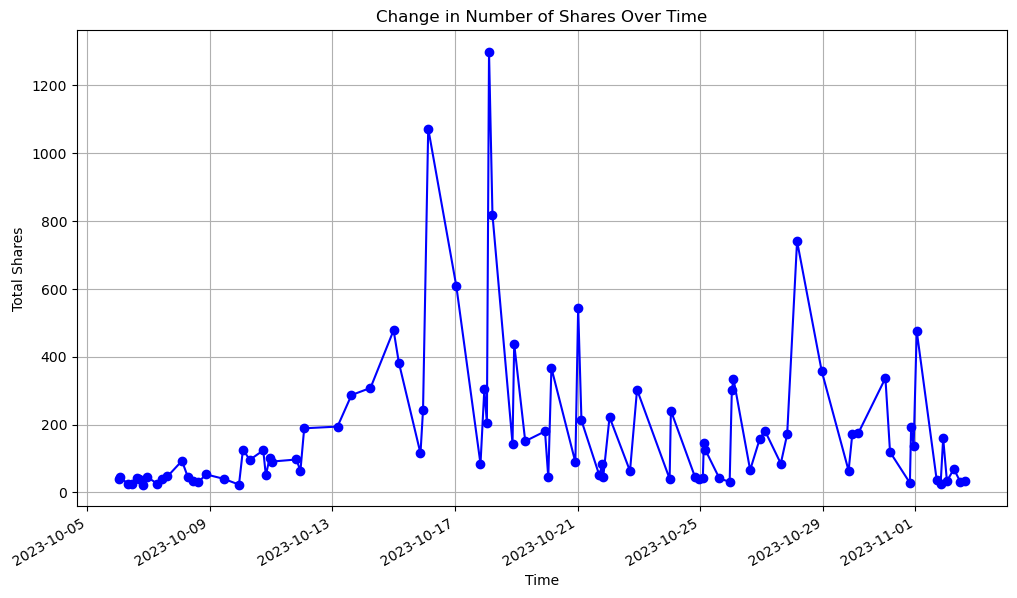

In [59]:
# Group by time and calculate the sum of shares for each time period
comments_by_time = df.groupby('time')['comments'].sum()

# Plotting
plt.figure(figsize=(12, 7))
comments_by_time.plot(kind='line', marker='o', color='blue')
plt.title('Change in Number of Shares Over Time')
plt.xlabel('Time')
plt.ylabel('Total Shares')
plt.grid(True)
plt.show()

    3. Sự thay đổi từng loại tương tác theo thời gian

In [60]:
df = pd.read_csv('Data/perfect_data.csv')
df['reactions'] = df['reactions'].apply(lambda x : dict(eval(x)))
dfs = df['reactions'].apply(pd.Series )
df_reactions = pd.concat([df, dfs], axis=1).drop('reactions', axis=1)
df_reactions['time'] = pd.to_datetime(df_reactions['time'])


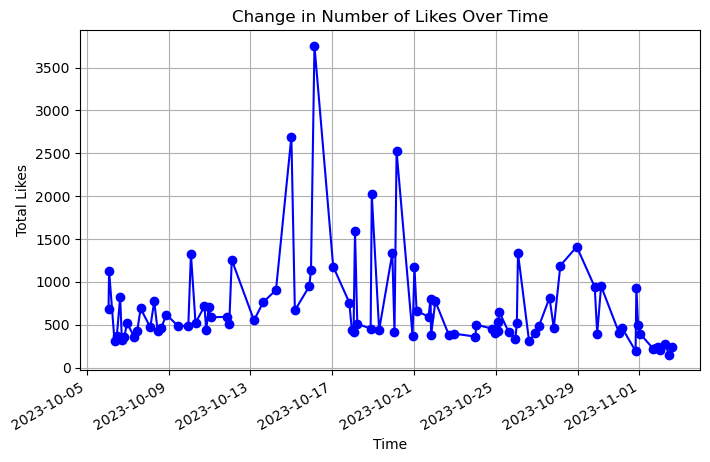

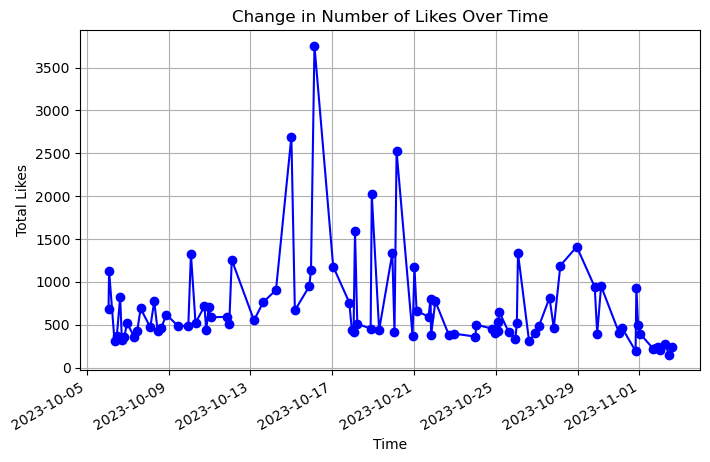

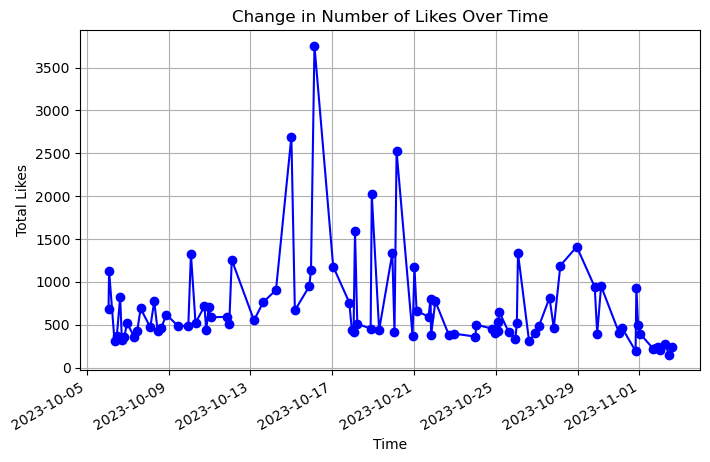

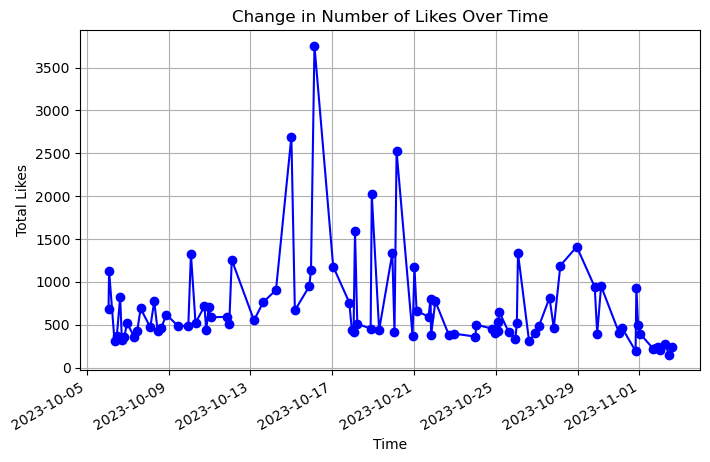

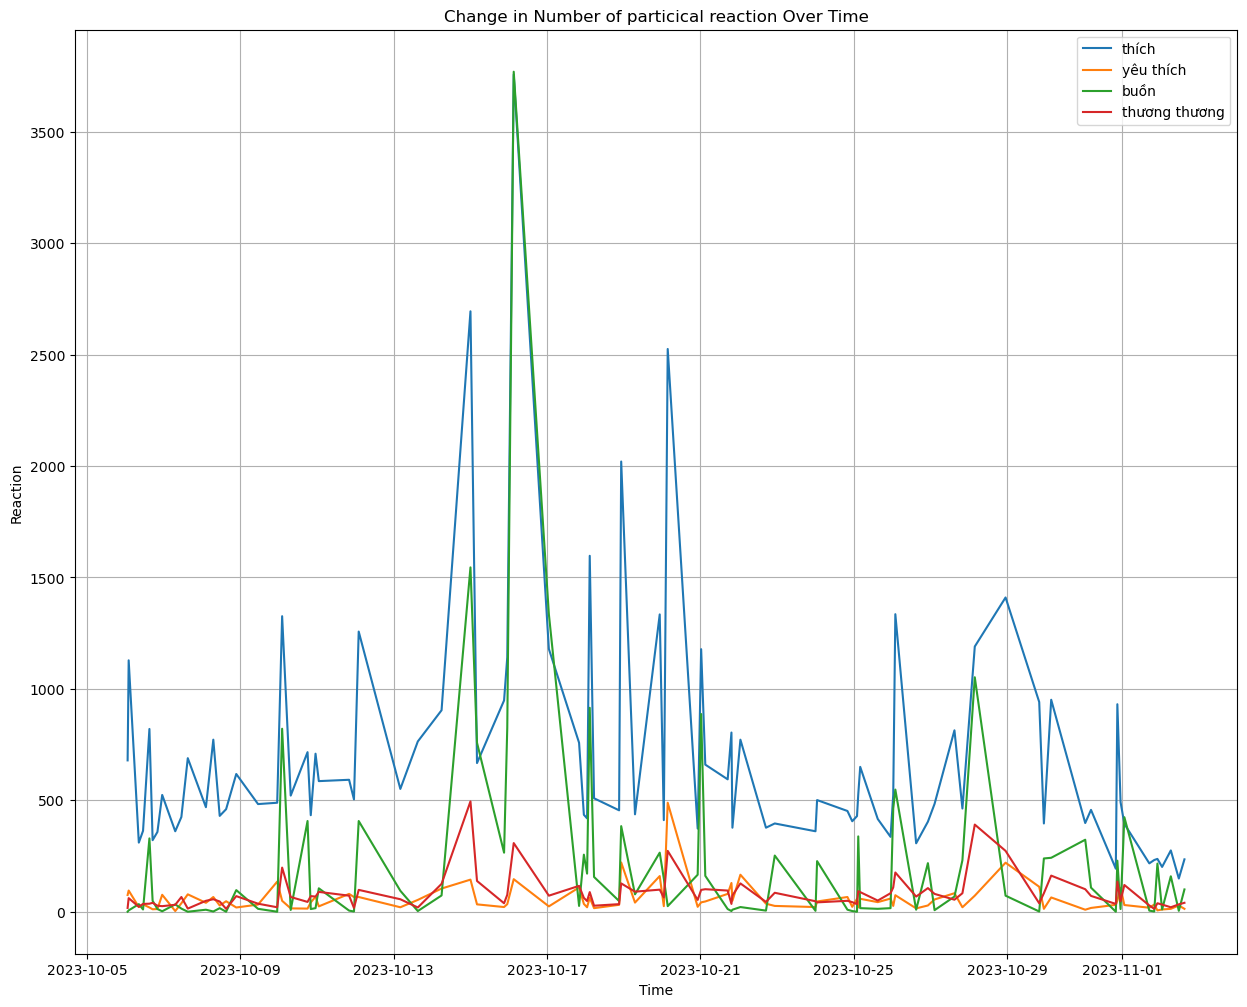

In [61]:
# Group by time and calculate the sum of shares for each time period
like_by_time = df_reactions.groupby('time')['thích'].sum()
love_by_time = df_reactions.groupby('time')['yêu thích'].sum()
sad_by_time = df_reactions.groupby('time')['buồn'].sum()
lovelove_by_time = df_reactions.groupby('time')['thương thương'].sum()

# Plotting 1
plt.figure(figsize=(8, 5))
like_by_time.plot(kind='line', marker='o', color='blue')
plt.title('Change in Number of Likes Over Time')
plt.xlabel('Time')
plt.ylabel('Total Likes')
plt.grid(True)
plt.show()

# Plotting 2
plt.figure(figsize=(8, 5))
like_by_time.plot(kind='line', marker='o', color='blue')
plt.title('Change in Number of Likes Over Time')
plt.xlabel('Time')
plt.ylabel('Total Likes')
plt.grid(True)
plt.show()

# Plotting 3
plt.figure(figsize=(8, 5))
like_by_time.plot(kind='line', marker='o', color='blue')
plt.title('Change in Number of Likes Over Time')
plt.xlabel('Time')
plt.ylabel('Total Likes')
plt.grid(True)
plt.show()

# Plotting 4
plt.figure(figsize=(8, 5))
like_by_time.plot(kind='line', marker='o', color='blue')
plt.title('Change in Number of Likes Over Time')
plt.xlabel('Time')
plt.ylabel('Total Likes')
plt.grid(True)
plt.show()

# Plotting 5
plt.figure(figsize=(15, 12))
plt.plot(df_reactions.groupby('time')['thích'].sum(), label='thích')
plt.plot(df_reactions.groupby('time')['yêu thích'].sum(), label='yêu thích')
plt.plot(df_reactions.groupby('time')['buồn'].sum(), label='buồn')
plt.plot(df_reactions.groupby('time')['thương thương'].sum(), label='thương thương')
plt.title('Change in Number of particical reaction Over Time')
plt.xlabel('Time')
plt.ylabel('Reaction')
plt.grid(True)
plt.legend()
plt.show()



    3. Sự tương quan giữa các reaction với nhau

<Axes: >

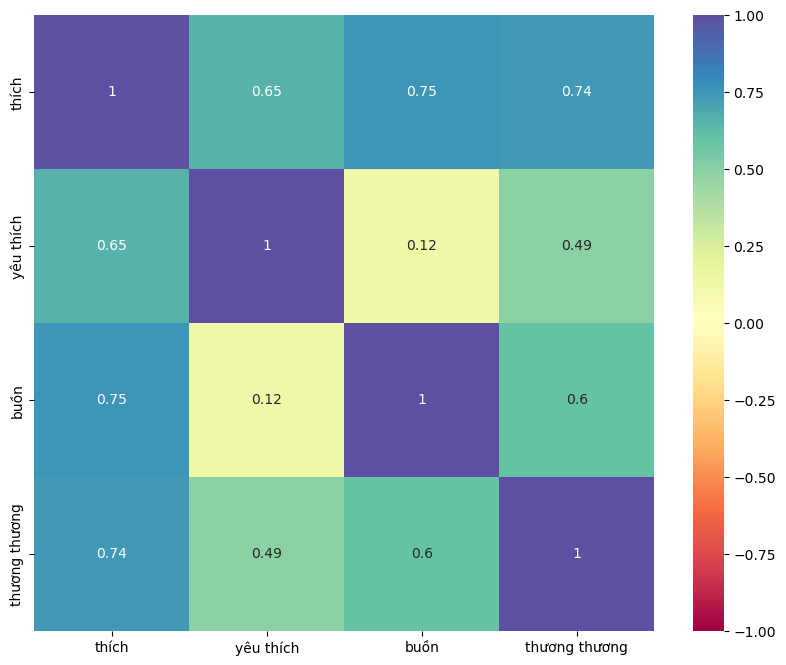

In [62]:
plt.figure(figsize=(10, 8))
corr = df_reactions[['thích', 'yêu thích', 'buồn', 'thương thương']].corr()
sns.heatmap(corr, annot=True, cmap='Spectral', vmin=-1, vmax=1)

    3. Phân loại bài viết và so sánh sự tương tác giữa các loại bài viết

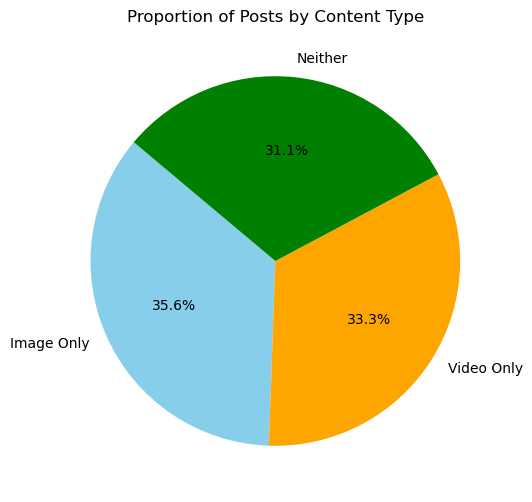

In [63]:
# Count the occurrences of each category
content_counts = df['content_type'].value_counts()
# Plotting the data
plt.figure(figsize=(12, 6))
content_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange', 'green', 'red'])
plt.title('Proportion of Posts by Content Type')
plt.ylabel('')  # Hide the y-label
plt.show()

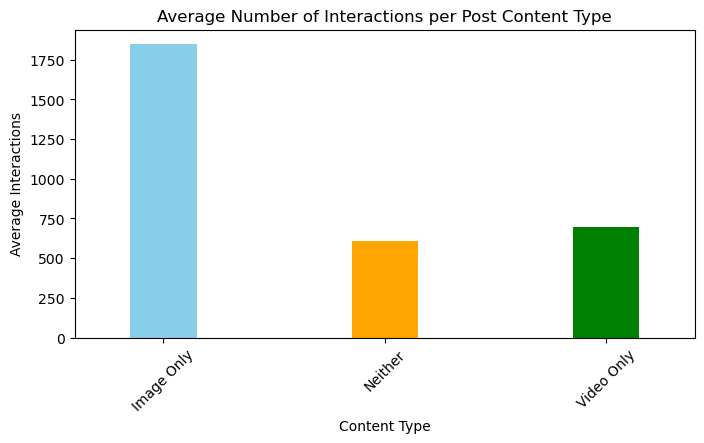

In [64]:
# Calculate the average number of interactions for each content type
avg_interactions = df.groupby('content_type')['reaction_count'].mean()

# Plotting the data as a bar chart
plt.figure(figsize=(8, 4))
avg_interactions.plot(kind='bar', color=['skyblue', 'orange', 'green', 'red'], width=0.3)
plt.title('Average Number of Interactions per Post Content Type')
plt.ylabel('Average Interactions')
plt.xlabel('Content Type')
plt.xticks(rotation=45)
plt.show()

    4. Sự tương quan giữa độ tương tác và độ dài post, thời gian đăng, số lượt chia sẻ và số lượt bình luận

<Axes: >

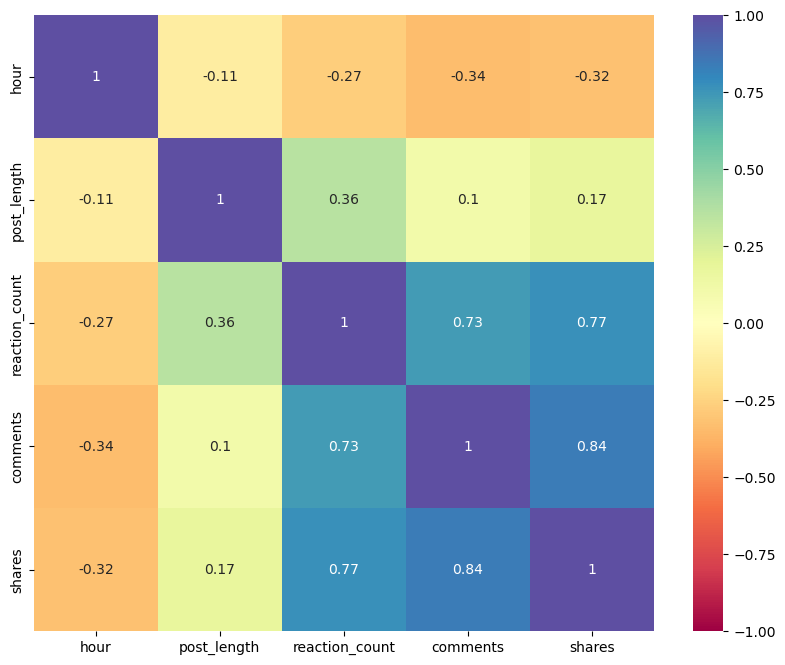

In [65]:
plt.figure(figsize=(10, 8))
corr = df[['hour', 'post_length', 'reaction_count', 'comments', 'shares']].corr()
sns.heatmap(corr, annot=True, cmap='Spectral', vmin=-1, vmax=1)

    5. Tỉ trọng các loại reaction của toàn bộ bài đăng và 5 bài nhiều tương tác nhất

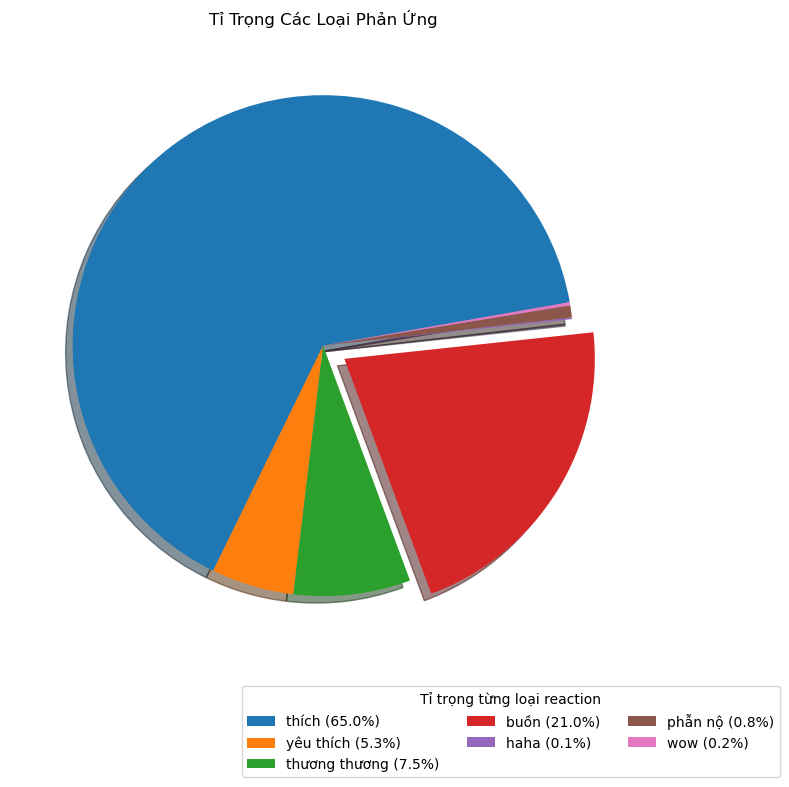

In [78]:
def str_to_dict(s):
    try:
        return eval(s)
    except:
        return {}
# Converting the reaction strings to dictionaries
reaction_dicts = df['reactions'].apply(str_to_dict)
# Aggregating the reaction types across all posts
total_reactions = {}
for reaction_dict in reaction_dicts:
    for reaction, count in reaction_dict.items():
        if reaction in total_reactions:
            total_reactions[reaction] += count
        else:
            total_reactions[reaction] = count

# Preparing data for plotting
reactions = list(total_reactions.keys())
counts = list(total_reactions.values())
total = sum(counts)
percentages = [f"{count / total * 100:.1f}%" for count in counts]
legend_labels = [f"{reaction} ({percent})" for reaction, percent in zip(reactions, percentages)]
# Generating different colors for each reaction type
colors = plt.cm.Paired(range(len(reactions)))

# Plotting the bar chart with different colors for each reaction type
myexplodes = np.array([0, 0, 0, 0.1, 0, 0, 0])
plt.figure(figsize=(8, 8))
plt.pie(counts, explode=myexplodes,shadow=True, startangle=10)
plt.title('Tỉ Trọng Các Loại Phản Ứng')
plt.legend(legend_labels, title="Tỉ trọng từng loại reaction", loc="lower center", bbox_to_anchor=(0.8, -0.2), ncol=3)
plt.tight_layout()

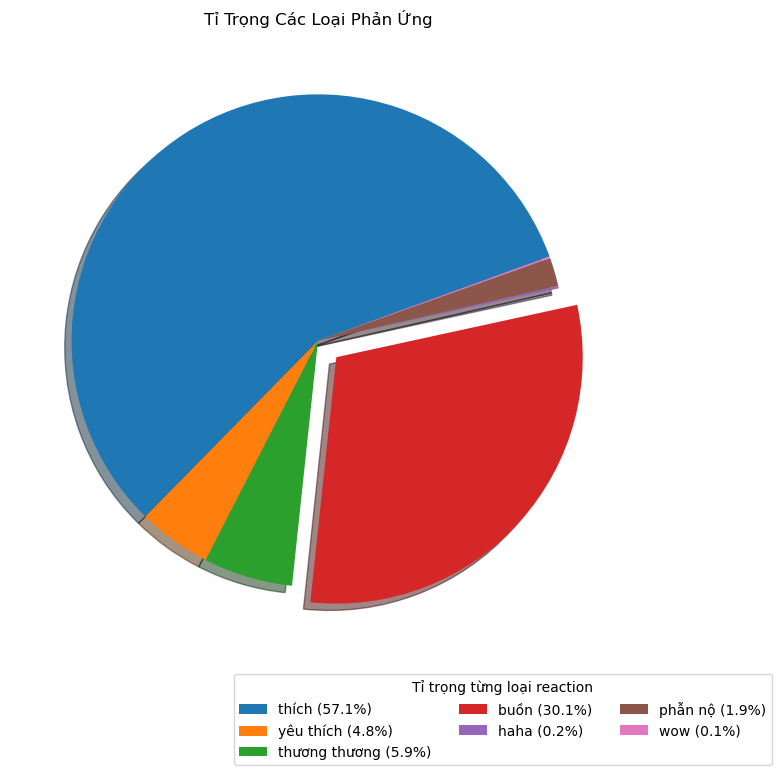

In [81]:
# Finding the top 5 posts with the most total reactions
top_5_posts = df.nlargest(5, 'reaction_count')

# Aggregating the reaction types for the top 3 posts
top_reactions = {reaction: 0 for reaction in reactions}  # Initialize a dictionary with all reaction types

for index, row in top_5_posts.iterrows():
    reaction_dict = str_to_dict(row['reactions'])
    for reaction, count in reaction_dict.items():
        top_reactions[reaction] += count

# Preparing data for plotting for the top 5 posts
top_counts = [top_reactions[reaction] for reaction in reactions]
total = sum(top_counts)
percentages = [f"{count / total * 100:.1f}%" for count in top_counts]
legend_labels = [f"{reaction} ({percent})" for reaction, percent in zip(reactions, percentages)]
# Generating different colors for each reaction type
colors = plt.cm.Paired(range(len(reactions)))

myexplodes = np.array([0, 0, 0, 0.1, 0, 0, 0])
plt.figure(figsize=(8, 8))
plt.pie(top_counts, explode=myexplodes,shadow=True, startangle=20)
plt.title('Tỉ Trọng Các Loại Phản Ứng')
plt.legend(legend_labels, title="Tỉ trọng từng loại reaction", loc="lower center", bbox_to_anchor=(0.8, -0.2), ncol=3)
plt.show()

Đa số là thích và buồn vì thương trẻ em vv, có một số ít phẫn nộ do chiến tranh gây ra

# Tần suất đăng bài

    1. Tần suất đăng bài theo thứ trong tuần

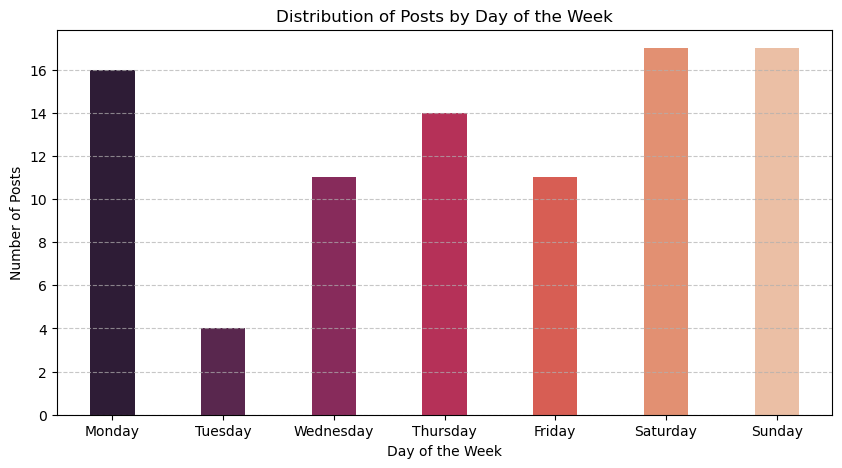

In [ ]:
# Calculating the number of posts per day of the week
posts_per_day_of_week = df['day_of_week'].value_counts().sort_index()

# Renaming index to actual days of the week
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
posts_per_day_of_week.index = days

# Plotting the distribution of post times by day of the week
plt.figure(figsize=(10, 5))
sns.barplot(x=posts_per_day_of_week.index, y=posts_per_day_of_week.values, palette="rocket", width=0.4)
plt.title('Distribution of Posts by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Posts')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


    2. Tần suất đăng bài theo giờ

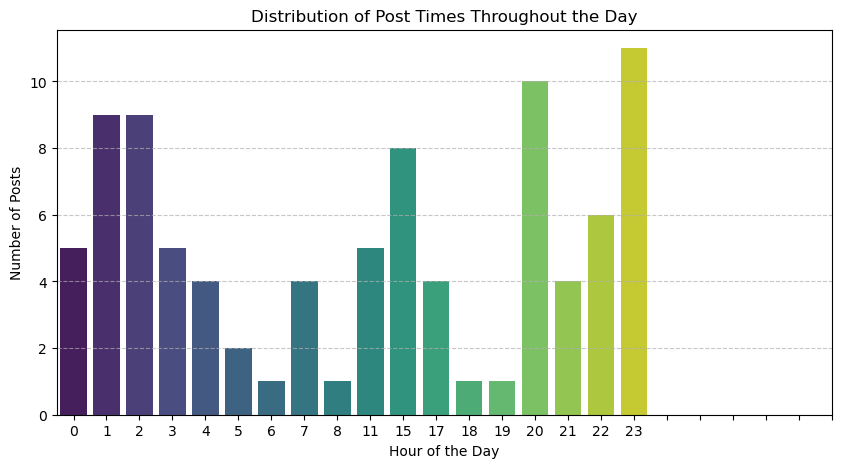

In [ ]:
# Plotting the distribution of post times
plt.figure(figsize=(10, 5))
sns.countplot(x='hour', data=df, palette="viridis")
plt.title('Distribution of Post Times Throughout the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Posts')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


    3. Biểu đồ nhiệt thể hiện tần suất đăng bài theo ngày và giờ

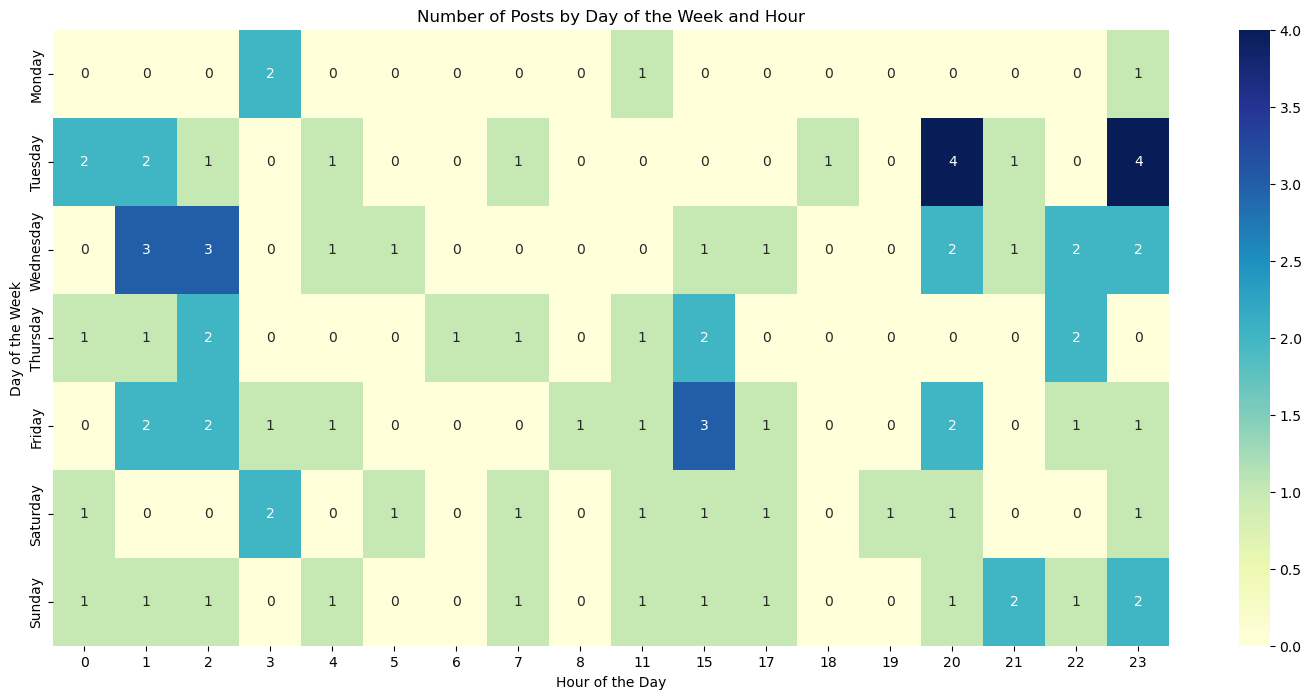

In [ ]:

# Create a pivot table to count the number of posts per day and hour
pivot_table = df.pivot_table(index='day_of_week', columns='hour', aggfunc='size', fill_value=0)

# Reorder the days of the week to start from Monday
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table.reindex(ordered_days)

# Plotting the heatmap
plt.figure(figsize=(18, 8))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Number of Posts by Day of the Week and Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()

# Từ khóa xuất hiện nhiều

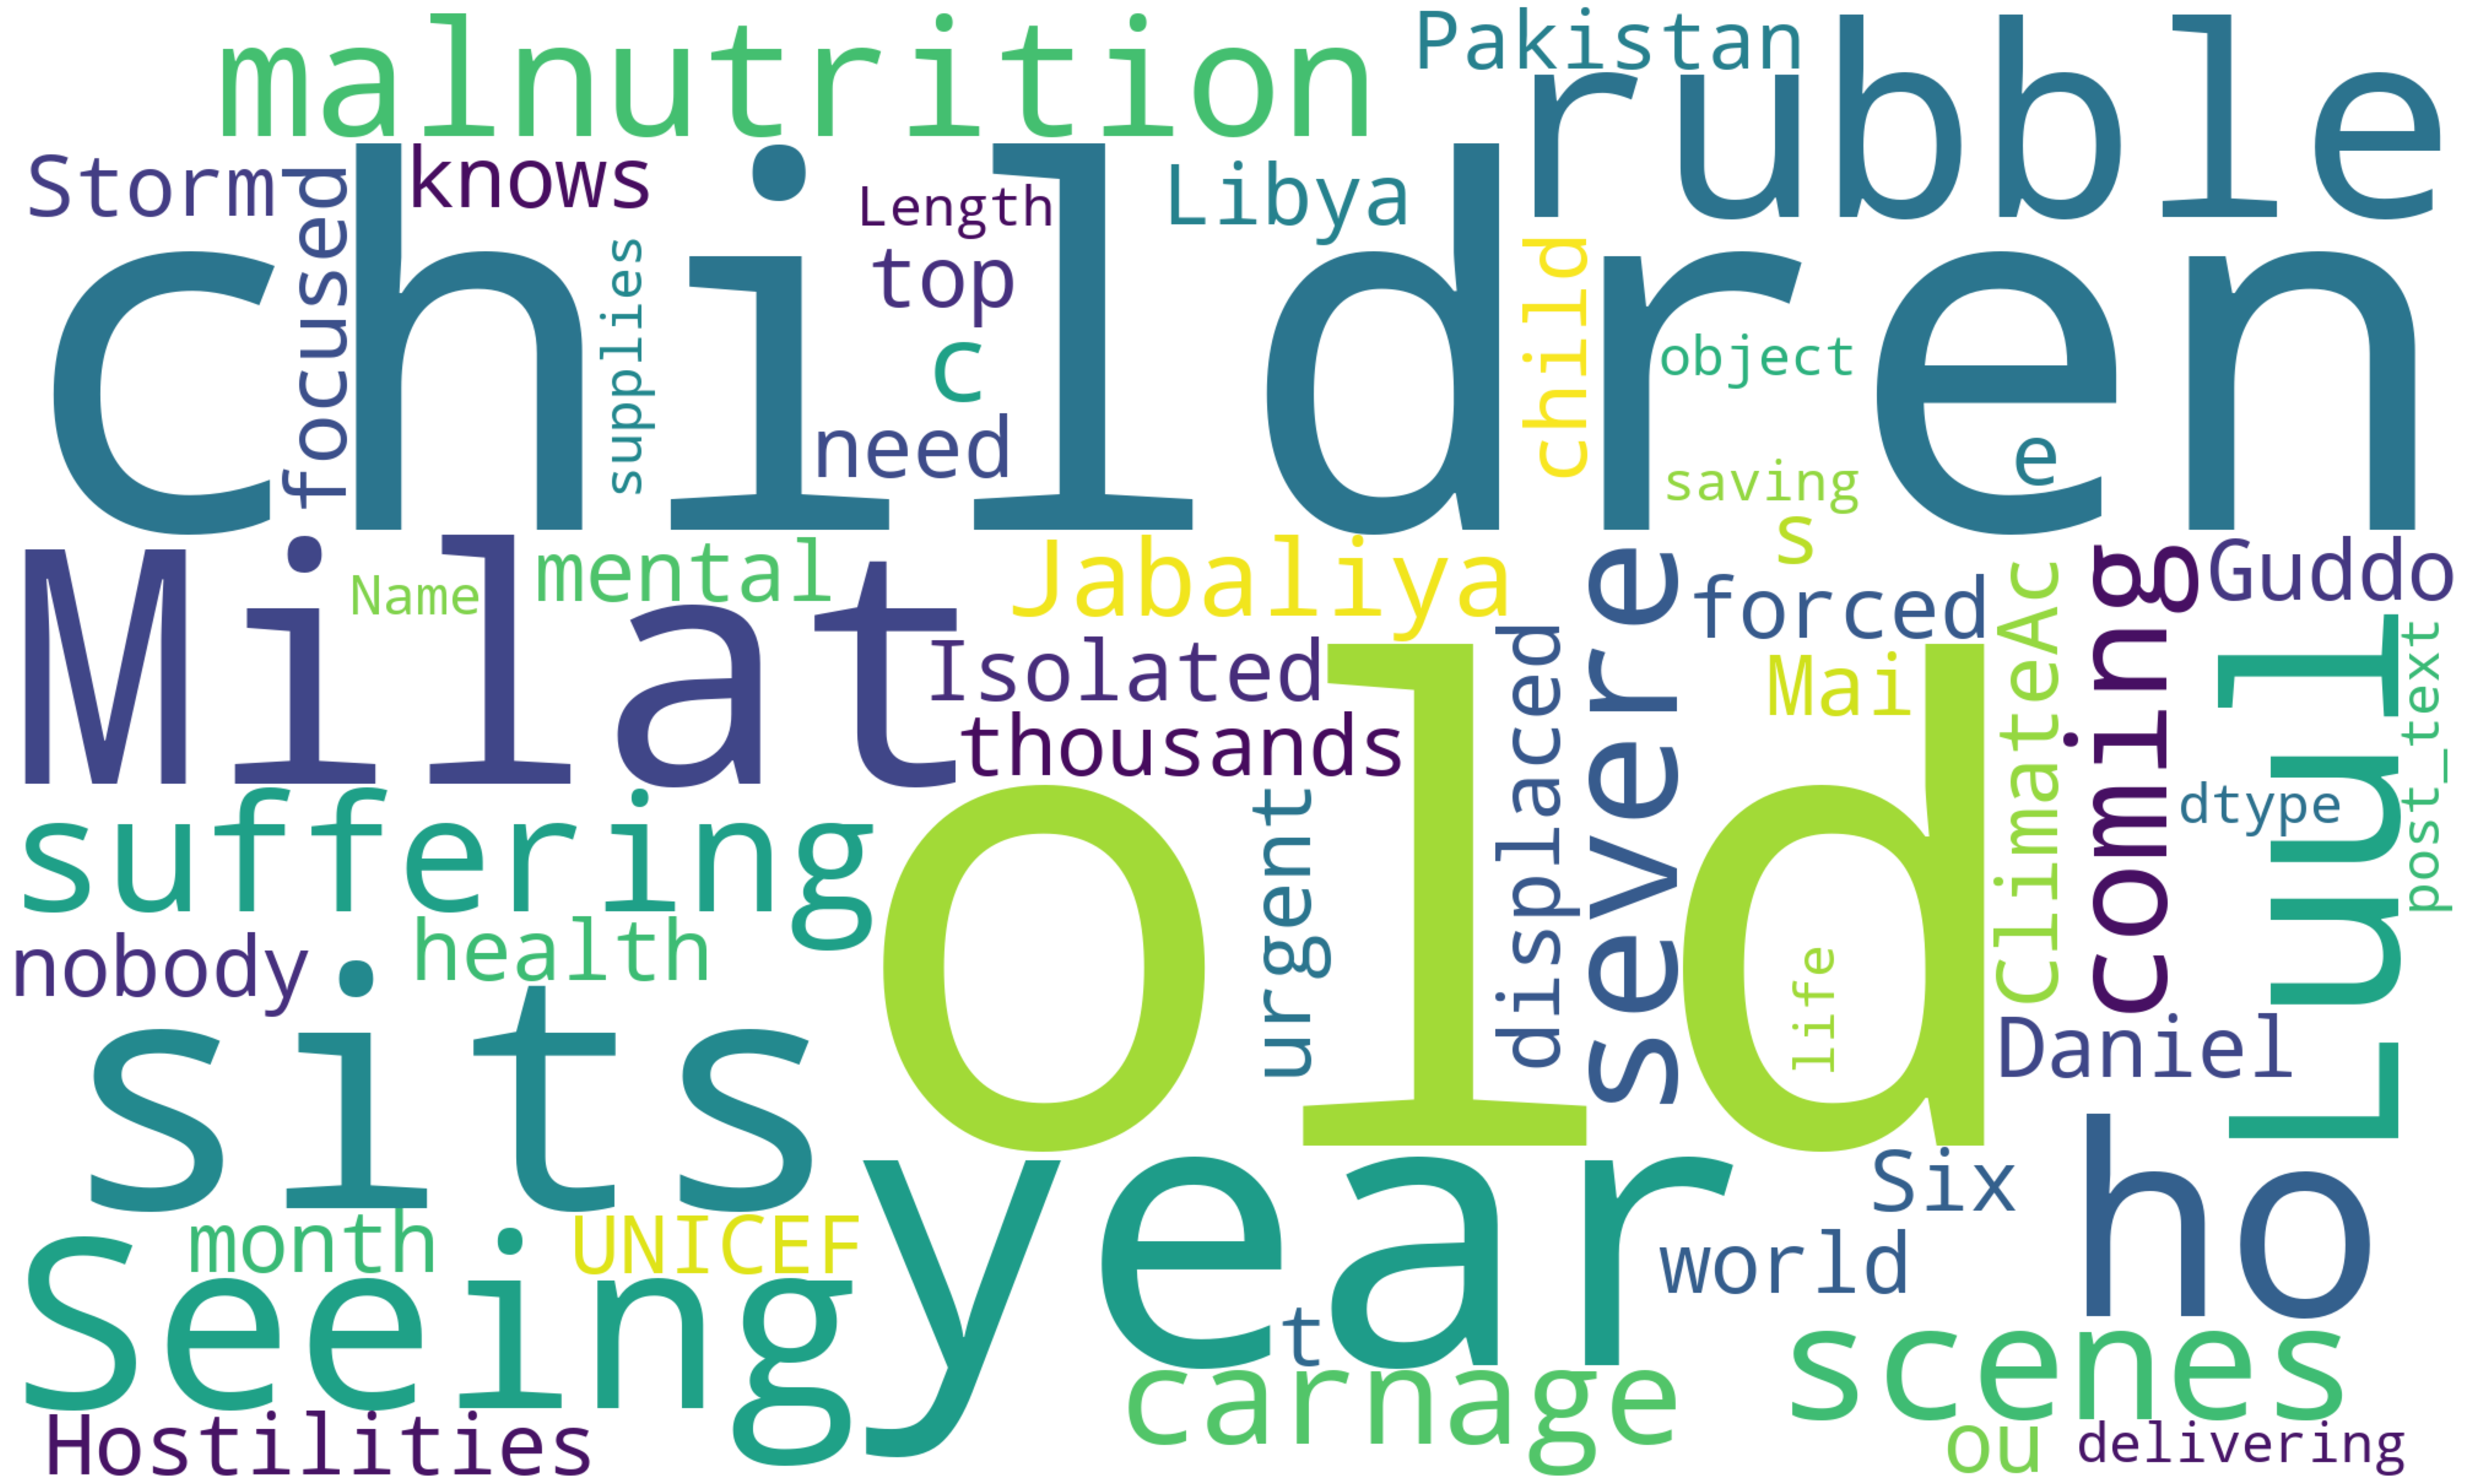

In [ ]:
text = str(df['post_text'])
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(45,25))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout()